In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
try:
    from google.colab import drive
    my_path = 'drive/My Drive/techlabs/'
    drive.mount('/content/drive')
except:
    my_path = 'dados/'

Mounted at /content/drive


In [6]:
df = pd.read_pickle(my_path + 'final-3.6.pkl.xz')
df = df.reset_index(drop=True)
print(f'Shape: {df.shape}')
print(f'Memory: {df.memory_usage().sum() // (1024**2) + 1} MB')
display(df.head())

Shape: (3931570, 42)
Memory: 383 MB


,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q022,Q023,Q024,Q025,IN_ESPECIALIZADO,IN_ESPECIFICO,IN_RECURSO
0,Santarém,PA,21,M,1,3,4,NaN,NaN,1,3,1,NaN,0,Santarém,PA,472.899994,466.000000,497.299988,369.100006,0,1,780.0,D,E,A,A,7,B,A,B,C,A,A,B,D,A,B,A,False,False,False
1,Mãe do Rio,PA,16,F,1,3,1,Paragominas,PA,3,0,1,NaN,1,Mãe do Rio,PA,358.899994,495.399994,482.299988,416.500000,1,1,600.0,D,E,A,A,5,B,A,B,C,A,A,B,B,A,A,A,False,False,False
2,Paragominas,PA,18,F,1,1,1,Paragominas,PA,2,0,3,1,0,Paragominas,PA,574.200012,538.700012,582.599976,571.500000,0,1,640.0,H,E,A,D,3,C,D,E,E,C,A,B,D,A,C,B,False,False,False
3,Ananindeua,PA,31,M,1,1,1,Belém,PA,1,7,1,1,0,Belém,PA,522.000000,592.599976,582.000000,605.299988,1,1,580.0,C,C,C,D,5,C,A,B,C,A,A,B,D,A,A,A,False,False,False
4,Marabá,PA,30,F,2,3,1,Marabá,PA,1,10,1,1,0,Marabá,PA,407.399994,480.100006,464.299988,581.500000,1,1,360.0,B,B,A,A,4,C,A,B,B,A,B,B,B,A,A,B,False,False,False


***Colunas que eu fiquei para analisar***

'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'SG_UF_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO',  'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA',
'NU_IDADE', 'TP_SEXO','TP_ESTADO_CIVIL','TP_COR_RACA','TP_NACIONALIDADE','TP_LINGUA'

|Coluna|Descrição|
|---|---|
|NO_MUNICIPIO_RESIDENCIA|Nome do município de residência|
|SG_UF_RESIDENCIA|Sigla da Unidade da Federação de residência|
|SG_UF_NASCIMENTO|Sigla da Unidade da Federação de nascimento|
|NO_MUNICIPIO_NASCIMENTO|Nome do município de nascimento|
|NO_MUNICIPIO_PROVA|Nome do município da aplicação da prova|
|SG_UF_PROVA|Sigla da Unidade da Federação da aplicação da prova|
|NU_IDADE|Idade2|
|TP_SEXO|Sexo|
|TP_ESTADO_CIVIL|Estado Civil|
|TP_COR_RACA|Cor/raça|
|TP_NACIONALIDADE|Nacionalidade|
|TP_LINGUA|Língua Estrangeira|


In [7]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [8]:
colunas = [
  'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'SG_UF_NASCIMENTO',
  'NO_MUNICIPIO_NASCIMENTO',  'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'NU_IDADE',
  'TP_SEXO','TP_ESTADO_CIVIL','TP_COR_RACA','TP_NACIONALIDADE','TP_LINGUA'
]

In [9]:
import json

with open(my_path + 'categorias.json', 'r') as f:
    c = json.load(f)
    categorias = {
        **c['participante'], **c['escola'], **c['especializado'], **c['especifico'],
        **c['recurso'], **c['local_prova'], **c['prova'], **c['redacao'], **c['socioeconomico']
    }

In [10]:
for c in colunas:
    if c in categorias:
        print(c)
        display(categorias[c])

TP_SEXO


{'F': 'Feminino ', 'M': 'Masculino'}

TP_ESTADO_CIVIL


{'0': 'Não informado',
 '1': 'Solteiro(a)',
 '2': 'Casado(a)/Mora com companheiro(a)',
 '3': 'Divorciado(a)/Desquitado(a)/Separado(a)',
 '4': 'Viúvo(a)'}

TP_COR_RACA


{'0': 'Não declarado',
 '1': 'Branca',
 '2': 'Preta',
 '3': 'Parda',
 '4': 'Amarela',
 '5': 'Indígena '}

TP_NACIONALIDADE


{'0': 'Não informado',
 '1': 'Brasileiro(a)',
 '2': 'Brasileiro(a) Naturalizado(a)',
 '3': 'Estrangeiro(a)',
 '4': 'Brasileiro(a) Nato(a), nascido(a) no exterior'}

TP_LINGUA


{'0': 'Inglês', '1': 'Espanhol'}

## Análises

In [11]:
Norte = ['AM','RR','AP','PA','TO','RO','AC']
Nordeste = ['MA','PI','CE','RN','PE','PB','SE','AL','BA']
Centro_Oeste = ['MT','MS','GO']
Sudeste = ['SP','RJ','ES','MG']
Sul = ['PR','SC','RS']
regioes = [Norte,Nordeste,Centro_Oeste,Sudeste,Sul]

In [12]:
dicionario_regioes ={'AM':'NORTE','RR':'NORTE','AP':'NORTE','PA':'NORTE','TO':'NORTE','RO':'NORTE','AC':'NORTE',
       'MA':'NORDESTE','PI':'NORDESTE','CE':'NORDESTE','RN':'NORDESTE','PE':'NORDESTE','PB':'NORDESTE',
       'SE':'NORDESTE','AL':'NORDESTE','BA':'NORDESTE','MT':'CENTRO-OESTE','MS':'CENTRO-OESTE',
       'GO':'CENTRO-OESTE','DF':'CENTRO-OESTE','SP':'SUDESTE','RJ':'SUDESTE','ES':'SUDESTE','MG':'SUDESTE','PR':'SUL',
       'SC':'SUL','RS':'SUL'}

df['Regiao_moradia'] = df['SG_UF_RESIDENCIA'].apply(lambda x : dicionario_regioes[x])

In [13]:
df['NO_MUNICIPIO_RESIDENCIA'].value_counts()

São Paulo         174342
Rio de Janeiro    107276
Fortaleza          73880
Brasília           71267
Salvador           65606
                   ...  
Sério                  6
Guaporema              6
Araguainha             4
Uiramutã               4
Forquetinha            4
Name: NO_MUNICIPIO_RESIDENCIA, Length: 5299, dtype: int64

In [14]:
Capital = [
  'Rio Branco', 'Maceió', 'Macapá', 'Manaus','Salavador',
  'Fortaleza', 'Brasília',  'Vitória', 'Goiânia',
  'São Luís', 'Cuiabá', 'Campo Grande', 'Belo Horizonte', 'Belém'
  'João Pessoa', 'Curitiba', 'Recife', 'Teresina', 'Rio de Janeiro'
  'Natal', 'Porto Alegre', 'Porto Velho', 'Boa Vista', 'Florianópolis',
  'São Paulo', 'Aracaju', 'Palmas'
]

df['Tipo_cidade'] = np.where(df['NO_MUNICIPIO_RESIDENCIA'].isin(Capital), 'Capital', 'Interior')

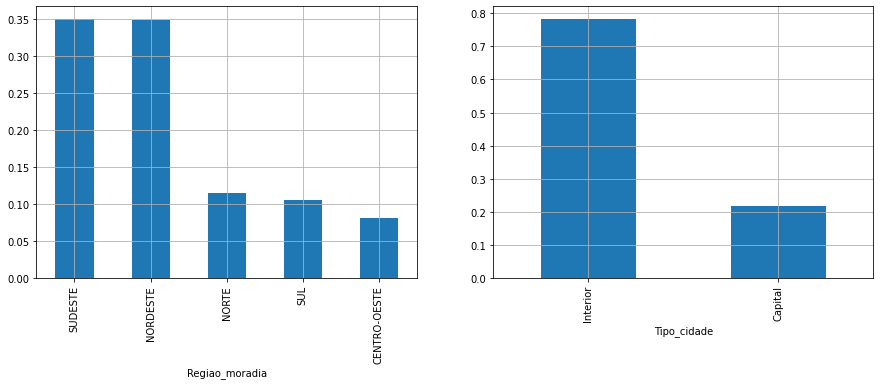

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
variavel = 'Regiao_moradia'
df[variavel].value_counts(normalize=True).plot.bar(ax=axs[0], grid=True)
axs[0].set_xlabel(variavel)

variavel = 'Tipo_cidade'
df[variavel].value_counts(normalize=True).plot.bar(ax=axs[1], grid=True)
axs[1].set_xlabel(variavel)

plt.show()

In [16]:
df['mudou_endereco'] = np.where(df['NO_MUNICIPIO_NASCIMENTO']==df['NO_MUNICIPIO_RESIDENCIA'], False, True)
df['moveu_prova'] = np.where(df['NO_MUNICIPIO_RESIDENCIA']==df['NO_MUNICIPIO_PROVA'], False, True)

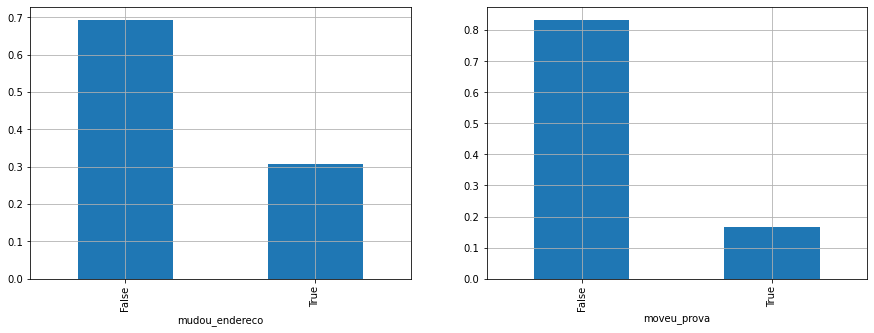

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
variavel = 'mudou_endereco'
df[variavel].value_counts(normalize=True).plot.bar(ax=axs[0], grid=True)
axs[0].set_xlabel(variavel)

variavel = 'moveu_prova'
df[variavel].value_counts(normalize=True).plot.bar(ax=axs[1], grid=True)
axs[1].set_xlabel(variavel)

plt.show()

In [18]:
df['NU_IDADE'].value_counts()

17    779146
18    743880
19    454445
20    304136
16    297390
       ...  
84         1
85         1
86         1
88         1
1          1
Name: NU_IDADE, Length: 89, dtype: int64

In [19]:
df['faixa_idades']=pd.cut(
   df['NU_IDADE'],
   bins=[0,16, 19, 22, 25, 29, 35, 40, 50, 60, 70, 80, 90],
   labels=['0-15','16-18','19-21','22-24','25-28', '29-34', '35-39', '40-49', '50-59','60-69','70-79','80-89']
)

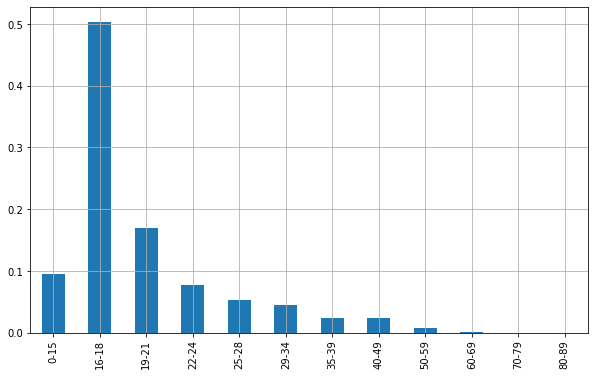

In [20]:
df['faixa_idades'].value_counts(normalize=True).sort_index().plot.bar(figsize=(10,6), grid=True)

In [21]:
variavel = 'faixa_idades'
tabela = pd.DataFrame({
    'descricao': list(df[variavel].dtype.categories),
    'frequencia': list(df[variavel].value_counts().sort_index()),
    'porcentagem': list(df[variavel].value_counts(normalize=True).sort_index())
})
tabela['acumulado'] = tabela['porcentagem'].cumsum()
print(variavel)
display(tabela)

faixa_idades


,descricao,frequencia,porcentagem,acumulado
0,0-15,374882,0.095352,0.095352
1,16-18,1977471,0.502973,0.598324
2,19-21,667491,0.169777,0.768102
3,22-24,302316,0.076895,0.844996
4,25-28,205566,0.052286,0.897282
5,29-34,175903,0.044741,0.942023
6,35-39,96279,0.024489,0.966512
7,40-49,95193,0.024212,0.990725
8,50-59,30824,0.007840,0.998565
9,60-69,5178,0.001317,0.999882


In [22]:
def cria_tabela(variavel):
    tabela = pd.DataFrame({
        'descricao': list(categorias[variavel].values()),
        'frequencia': list(df[variavel].value_counts().sort_index()),
        'porcentagem': list(df[variavel].value_counts(normalize=True).sort_index())
    })
    print(variavel)
    display(tabela)

TP_SEXO


,descricao,frequencia,porcentagem
0,Masculino,1590845,0.404634
1,Feminino,2340725,0.595366


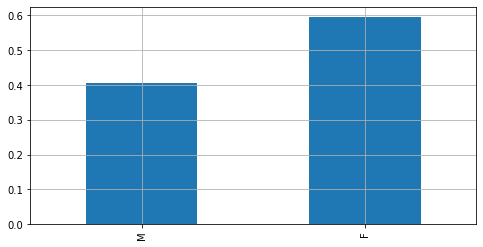

In [23]:
#df['TP_SEXO'].value_counts(normalize=True).plot.bar(figsize=(10,6), grid=True)
cria_tabela('TP_SEXO')
df['TP_SEXO'].value_counts(normalize=True).sort_index().plot.bar(figsize=(8,4), grid=True)

TP_ESTADO_CIVIL


,descricao,frequencia,porcentagem
0,Não informado,140463,0.035727
1,Solteiro(a),3488267,0.887245
2,Casado(a)/Mora com companheiro(a),242327,0.061636
3,Divorciado(a)/Desquitado(a)/Separado(a),56426,0.014352
4,Viúvo(a),4087,0.001040


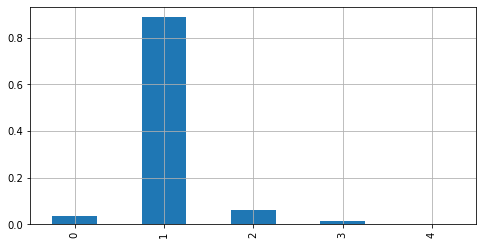

In [24]:
#df['TP_ESTADO_CIVIL'].value_counts(normalize=True)
cria_tabela('TP_ESTADO_CIVIL')
df['TP_ESTADO_CIVIL'].value_counts(normalize=True).sort_index().plot.bar(figsize=(8,4), grid=True)

TP_COR_RACA


,descricao,frequencia,porcentagem
0,Não declarado,78400,0.019941
1,Branca,1453618,0.369730
2,Preta,483856,0.123069
3,Parda,1802255,0.458406
4,Amarela,90038,0.022901
5,Indígena,23403,0.005953


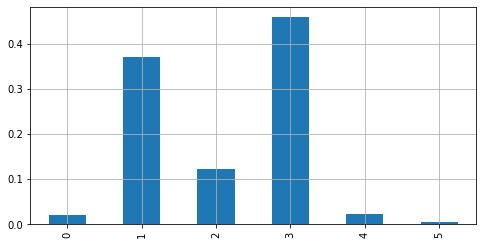

In [25]:
#df['TP_COR_RACA'].value_counts(normalize=True).plot.bar(figsize=(10,6), grid=True)
#df['TP_COR_RACA'].value_counts(normalize=True)
cria_tabela('TP_COR_RACA')
df['TP_COR_RACA'].value_counts(normalize=True).sort_index().plot.bar(figsize=(8,4), grid=True)

TP_LINGUA


,descricao,frequencia,porcentagem
0,Inglês,1939397,0.493288
1,Espanhol,1992173,0.506712


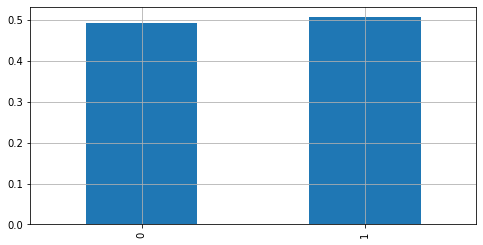

In [26]:
#df['TP_LINGUA'].value_counts(normalize=True).plot.bar(figsize=(10,6), grid=True)
cria_tabela('TP_LINGUA')
df['TP_LINGUA'].value_counts(normalize=True).sort_index().plot.bar(figsize=(8,4), grid=True)

TP_NACIONALIDADE


,descricao,frequencia,porcentagem
0,Não informado,5353,0.001362
1,Brasileiro(a),3818053,0.971127
2,Brasileiro(a) Naturalizado(a),96799,0.024621
3,Estrangeiro(a),4516,0.001149
4,"Brasileiro(a) Nato(a), nascido(a) no exterior",6849,0.001742


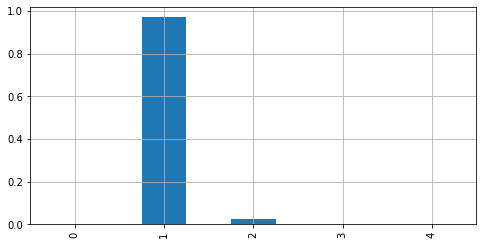

In [27]:
#df['TP_NACIONALIDADE'].value_counts(normalize=True).plot.bar(figsize=(10,6), grid=True)
cria_tabela('TP_NACIONALIDADE')
df['TP_NACIONALIDADE'].value_counts(normalize=True).sort_index().plot.bar(figsize=(8,4), grid=True)

## Correlação



In [28]:
def plota_boxplot_provas(variavel, rotate=False):
    fig, axs = plt.subplots(1, 5, figsize=(24,5))
    for idx, p in enumerate(provas):
        ax = sns.boxplot(x=variavel, y=p, data=df, ax=axs[idx])
        ax.set_ylim(-50, 1050)
        ax.set_ylabel('')
        ax.set_xlabel(p)
    if rotate:
        plt.draw()
        for ax in axs:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    fig.suptitle(variavel)

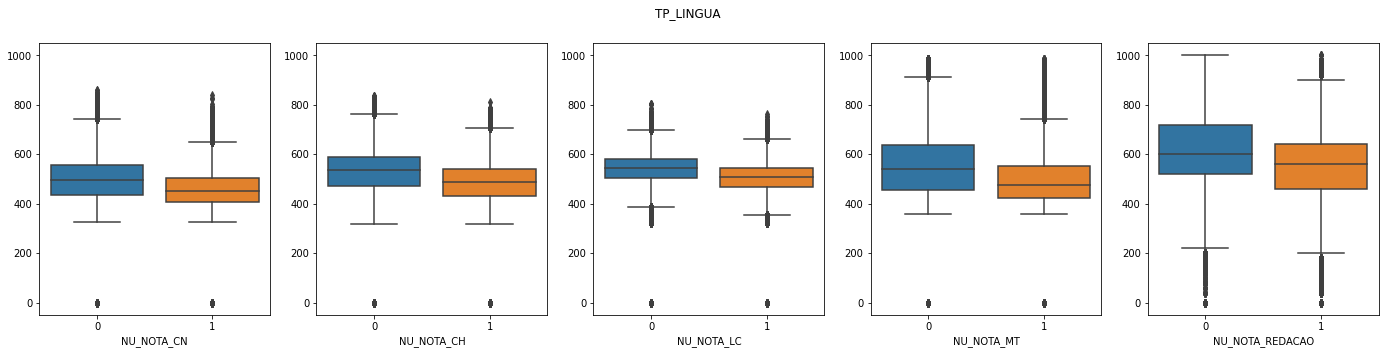

In [29]:
#sns.boxplot(x='TP_LINGUA',y='NU_NOTA_LC',data=df)
plota_boxplot_provas('TP_LINGUA')

{'0': 'Não declarado', '1': 'Branca', '2': 'Preta', '3': 'Parda', '4': 'Amarela', '5': 'Indígena '}


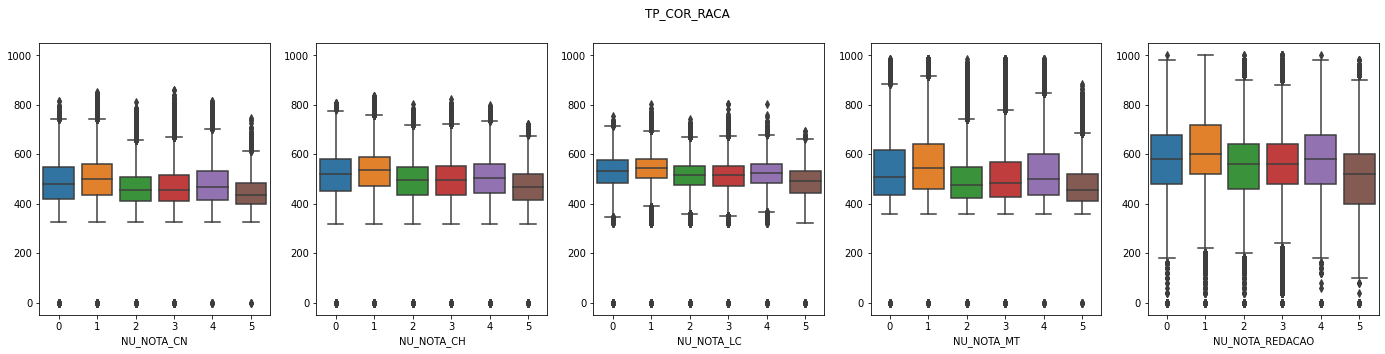

In [30]:
print(categorias['TP_COR_RACA'])
plota_boxplot_provas('TP_COR_RACA')

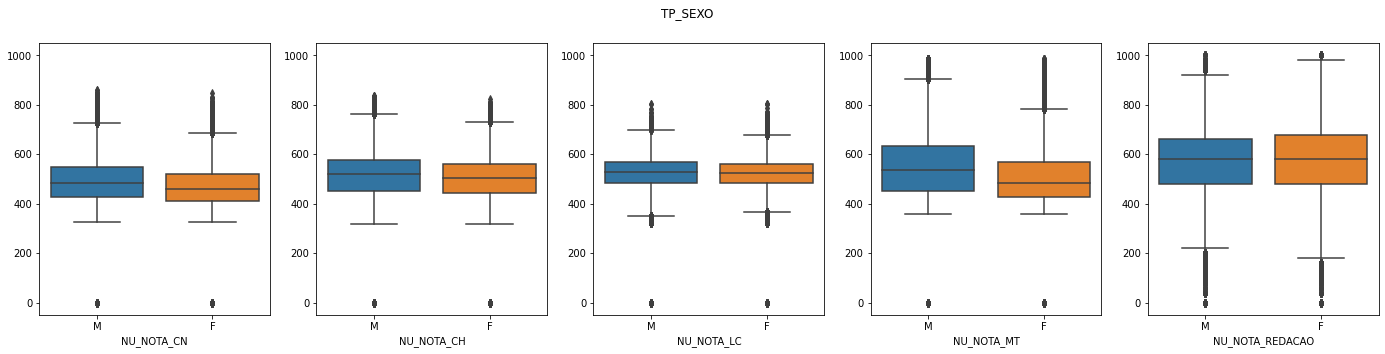

In [31]:
plota_boxplot_provas('TP_SEXO')

{'0': 'Não informado',
 '1': 'Solteiro(a)',
 '2': 'Casado(a)/Mora com companheiro(a)',
 '3': 'Divorciado(a)/Desquitado(a)/Separado(a)',
 '4': 'Viúvo(a)'}

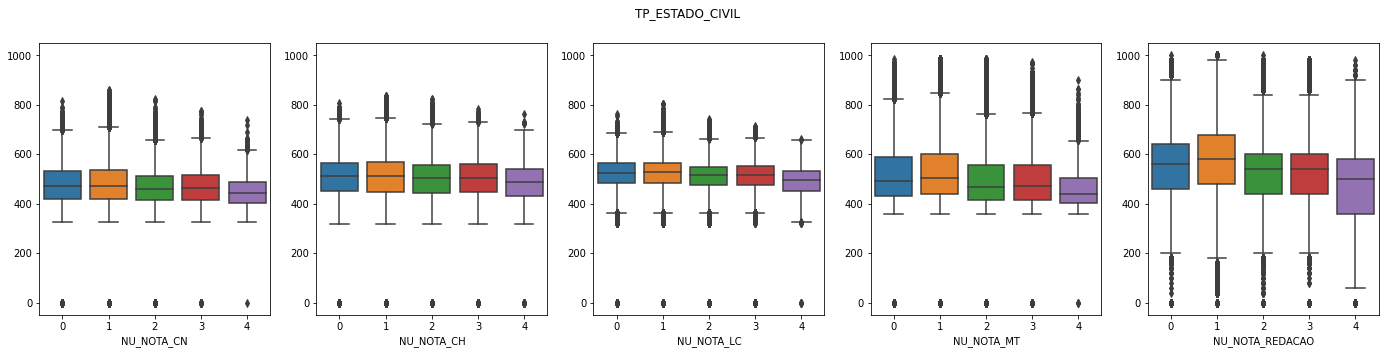

In [32]:
display(categorias['TP_ESTADO_CIVIL'])
plota_boxplot_provas('TP_ESTADO_CIVIL')

In [33]:
df['faixa_idades'].dtype

CategoricalDtype(categories=['0-15', '16-18', '19-21', '22-24', '25-28', '29-34', '35-39',
                  '40-49', '50-59', '60-69', '70-79', '80-89'],
                 ordered=True)

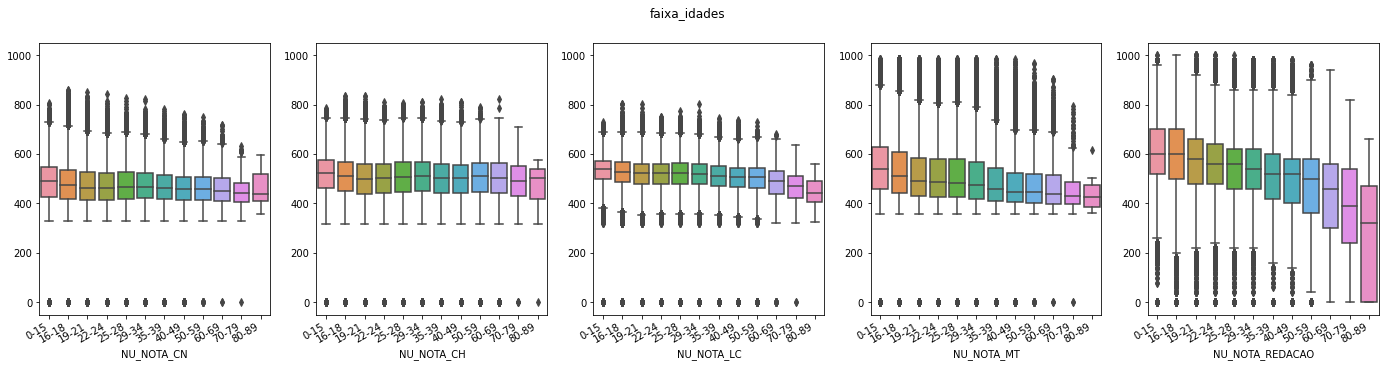

In [34]:
plota_boxplot_provas('faixa_idades', rotate=True)

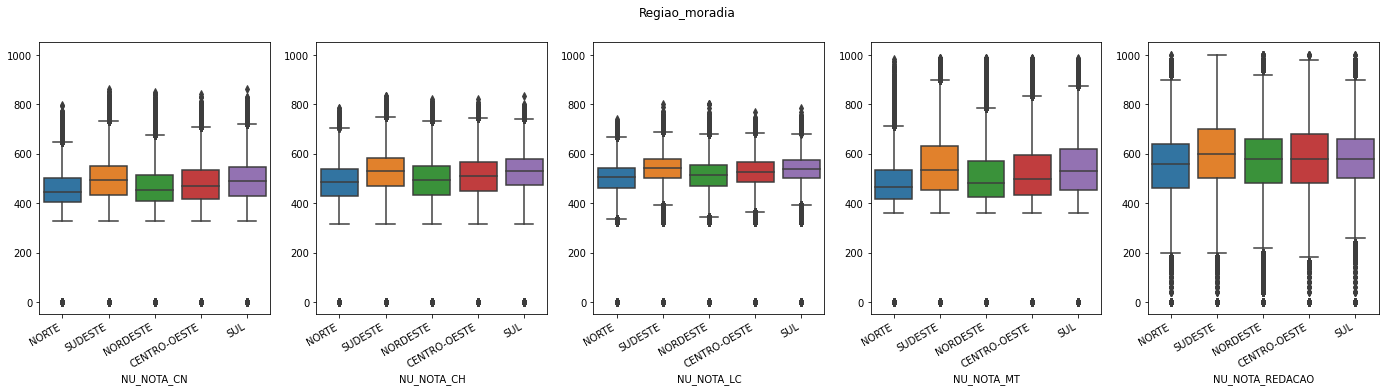

In [35]:
plota_boxplot_provas('Regiao_moradia', rotate=True)

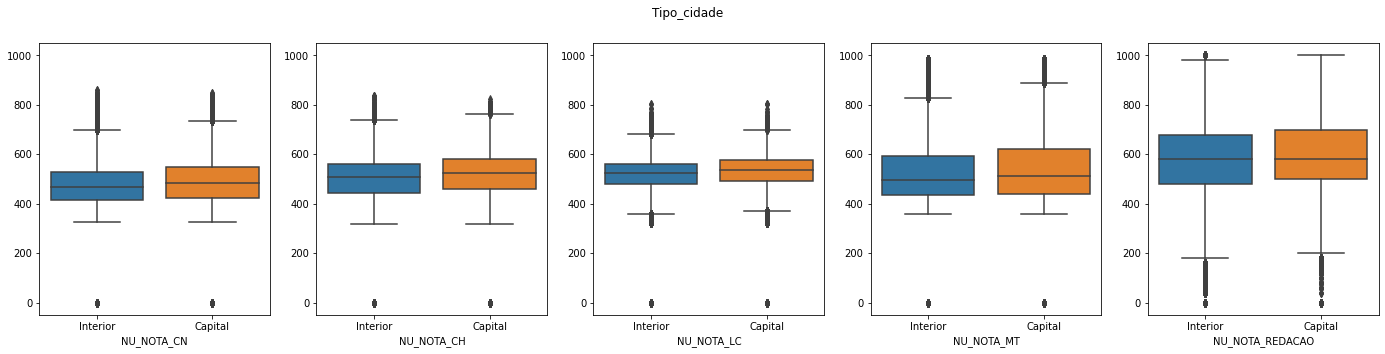

In [36]:
plota_boxplot_provas('Tipo_cidade')

In [37]:
pd.DataFrame({
    'media': df[provas].mean(),
    'mediana': df[provas].median(),
    'minimo': df[provas].min(),
    'maximo': df[provas].max()
})


,media,mediana,minimo,maximo
NU_NOTA_CN,477.129486,470.299988,0.0,860.900024
NU_NOTA_CH,507.144409,510.600006,0.0,835.099976
NU_NOTA_LC,520.025940,526.200012,0.0,801.700012
NU_NOTA_MT,522.217407,501.100006,0.0,985.500000
NU_NOTA_REDACAO,571.218384,580.000000,0.0,1000.000000


## Conclusões

**Distribuições e características**

- As regiões com maior número de participantes são os estados de Sudeste e Nordeste.
- Basicamente 80% das pessoas que realizam o ENEM moram no interior
- Quase 70% dos participantes moram no mesmo local onde nasceram.
- Menos de 20% das pessoas fizeram prova em um município diferente do que moram.
- Mais de 50% de quem faz a prova tem entre 16 e 18 anos, mais de 80% tem menos de 28.
- Aproximadamente 60% dos participantes é do sexo feminino.
- Cerca de 90% dos participantes são solteiros.
- Quase metade dos participantes se declara pardo, depois 37% se declara branco, e 12% preto. A porcentagem de quem não se declarou é baixa.
- A quantidade que escolhe inglês e espanhol é quase igual.
- O número de não brasileiros fazendo a prova é quase desprezível.
 
**Correlação.**

- Alunos que escolheram inglês tiveram uma nota levemente superior.
- Brancos obtiveram notas mais altas, sobretudo em matemática. 
- Os homens tiram notas maiores em matemática enquanto as mulheres se sobressaem levemente na redação.
- Aparentemente pessoas que tem/tiveram um companheiro tiveram um desempenho levemente pior.
- Conforme a idade aumenta as notas são menores, sobretudo em matemática e redacao.
- A regiao sudeste apresenta as melhores notas, mas essa diferença é mais significativa na nota de matemática.
- Capital e interior não mostraram diferenças significativas de notas.